# Capstone Project: 
## Data Cleaning and EDA

In [1]:
# import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# reading in datasets
chew_df = pd.read_csv('data/chewtoy_df.csv')
fetch_df = pd.read_csv('data/fetchtoy_df.csv')
interactive_df = pd.read_csv('data/interactivetoy_df.csv')
plush_df = pd.read_csv('data/plushtoy_df.csv')
ropetug_df = pd.read_csv('data/ropetugtoy_df.csv')

Looking at each dataframe first:

In [3]:
# Chew Toys
chew_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat
0,Nylabone Teething Pacifier Puppy Chew Toy,$3.59,['Every puppy needs a pacifier to soothe teeth...,['Designed to encourage positive play and teac...,4_2,"[<span class=""ugc-list__review__display"">I do ...",moderate,chew toys
1,"KONG Puppy Dog Toy, Color Varies",$6.99,"[""The Puppy KONG dog toy is customized for a g...",['Unpredictable bounce is great for energetic ...,4_3,"[<span class=""ugc-list__review__display"">I hav...",moderate,chew toys
2,Petstages Dogwood Tough Dog Chew Toy,$8.83,"[""Chewing is a natural behavior in all dogs, a...",['Chew toy that combines real wood with synthe...,4_2,"[<span class=""ugc-list__review__display"">Our 8...",moderate,chew toys


In [4]:
# Fetch Toys
# need to drop index column -- FIX ONCE YOU FIX THE DATA COLLECTION SIDE 
fetch_df.drop(columns=['Unnamed: 0'], inplace=True)

fetch_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat
0,Pet Qwerks Puppy Puck Dog Toy,$6.96,['Let the games begin with the Pet Qwerks Pupp...,['Durable dog toy is great for both indoor and...,1_8,"[<span class=""ugc-list__review__display"">He ab...",balls,fetch toys
1,KONG Classic Flyer Frisbee Dog Toy,$10.99,['The KONG Flyer is the best soft rubber disc ...,['Made out of KONG Classic durable rubber for ...,4_3,"[<span class=""ugc-list__review__display"">We've...",discs,fetch toys
2,"Chuckit! Flying Squirrel Dog Toy, Color Varies",$8.69,"[""As if chasing a running squirrel wasn't enou...",['Multilayer construction for added durability...,4_3,"[<span class=""ugc-list__review__display"">We ha...",discs,fetch toys


In [5]:
# Interactive Toys 
interactive_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat
0,"KONG Puppy Dog Toy, Color Varies",$6.99,"[""The Puppy KONG dog toy is customized for a g...",['Unpredictable bounce is great for energetic ...,4_3,"[<span class=""ugc-list__review__display"">I hav...",treat toys & dispensers,interactive toys
1,Pet Zone IQ Treat Dispenser Ball Dog Toy,$12.45,['Have your pet work for his treats with the P...,['Mentally and physically engages your dog to ...,3_7,"[<span class=""ugc-list__review__display"">I hav...",treat toys & dispensers,interactive toys
2,Starmark Everlasting Treat Bento Ball Tough Do...,$12.16,"[""The Everlasting Treat Bento Ball is a fun wa...",['Includes an edible chicken-flavored treat - ...,3_3,"[<span class=""ugc-list__review__display"">I lik...",treat toys & dispensers,interactive toys


In [6]:
plush_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat
0,KONG Cozie Marvin the Moose Plush Dog Toy,$4.99,"['The KONG Cozies are cute, soft and cuddly pl...",['Soft and cuddly plush toys made with an extr...,4_0,"[<span class=""ugc-list__review__display"">My pi...",stuffed,plush toys
1,KONG Cozie Baily the Blue Dog Toy,$5.82,"['The KONG Cozies are cute, soft and cuddly pl...",['Soft and cuddly plush toys made with an extr...,4_1,"[<span class=""ugc-list__review__display"">My 20...",stuffed,plush toys
2,Frisco Plush with Rope Squeaking Monkey Dog Toy,$5.98,"['Toss, squeak, repeat—bring on every game wit...",['Plush monkey dog toy features a built-in squ...,4_4,"[<span class=""ugc-list__review__display"">We go...",stuffed,plush toys


In [7]:
ropetug_df.head(3)

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat
0,"Mammoth Cloth Rope Tug for Dogs, Color Varies",$6.18,"[""Toss, tug, and floss! Mammoth cloth rope toy...","['Made from 100% natural cotton', ""Rope fibers...",3_6,"[<span class=""ugc-list__review__display"">Bough...",rope_tug_toys,rope & tug toys
1,Chuckit! Fetch Wheel Dog Toy,$11.91,"['Fling it, roll it, play tug-of-war! Chuckit...",['Bright color gives increased visibility and ...,4_3,"[<span class=""ugc-list__review__display"">Hi I ...",rope_tug_toys,rope & tug toys
2,"KONG Tuggerknots Frog Dog Toy, Small/Medium",$11.99,"['The KONG TuggerKnots are tough, interactive ...","['Perfect for interactive games of tug', 'Mini...",3_6,"[<span class=""ugc-list__review__display"">Did n...",rope_tug_toys,rope & tug toys


### Merge dataframes into one large dataframe

In [8]:
# How many rows should be in the combined dataframe
chew_df.shape[0] + fetch_df.shape[0] + interactive_df.shape[0] + plush_df.shape[0] + ropetug_df.shape[0]

2399

In [9]:
# merging the dataframes together into one large one, df
df = pd.merge(left=chew_df, right=fetch_df, how='outer')
df = pd.merge(left=df, right=interactive_df, how='outer')
df = pd.merge(left=df, right=plush_df, how='outer')
df = pd.merge(left=df, right=ropetug_df, how='outer')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2399 entries, 0 to 2398
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2399 non-null   object
 1   price         2399 non-null   object
 2   descriptions  2399 non-null   object
 3   key_benefits  2389 non-null   object
 4   rating        2399 non-null   object
 5   reviews       2399 non-null   object
 6   subcat        2399 non-null   object
 7   cat           2399 non-null   object
dtypes: object(8)
memory usage: 168.7+ KB


Looking at the different datatypes, I note that I will have to change both price and ratings to floats. 

First to look at Price column.

In [11]:
# To first get rid of the '$' in the price column 
df['price'] = df['price'].map(lambda x: x[1:])

In [12]:
# To change the type to float
df['price'] = df['price'].astype(float)

In [13]:
# Checking to make sure changes held
df['price']

0        3.59
1        6.99
2        8.83
3        6.57
4        6.89
        ...  
2394    12.38
2395    14.99
2396    14.99
2397     8.91
2398    13.98
Name: price, Length: 2399, dtype: float64

Now to look at ratings.

In [14]:
# Need to replace the '_' with "."
df['rating'] = df['rating'].map(lambda x: f'{x[0]}.{x[2]}')

In [15]:
# Now convertin the rating to float
df['rating'] = df['rating'].astype(float)

In [16]:
# Checking the rating column
df['rating']

0       4.2
1       4.3
2       4.2
3       4.1
4       4.1
       ... 
2394    0.0
2395    0.0
2396    0.0
2397    3.9
2398    4.8
Name: rating, Length: 2399, dtype: float64

Now to look at the descriptions and key_benefits columns

In [17]:
df[['descriptions', 'key_benefits']]

,descriptions,key_benefits
0,['Every puppy needs a pacifier to soothe teeth...,['Designed to encourage positive play and teac...
1,"[""The Puppy KONG dog toy is customized for a g...",['Unpredictable bounce is great for energetic ...
2,"[""Chewing is a natural behavior in all dogs, a...",['Chew toy that combines real wood with synthe...
3,['Great for teething and tugging! The Puppy Te...,['Designed to encourage positive play and teac...
4,['Curious puppies have met their match with th...,['Non-edible dog toy is made for teething pupp...
...,...,...
2394,['Your furry friend will be ready to fight cri...,['Tug toy featuring Spider-Man on both sides.'...
2395,['Your furry friend will be ready to fight cri...,"['Tug toy featuring The Metropolis Marvel.', '..."
2396,['Your furry friend will be ready to fight cri...,['Tug toy featuring Barry Allen’s alter ego on...
2397,['There’s more than one way to have fun with t...,['Treat-dispensing design holds treats on eith...


In [18]:
df['descriptions'][0]

"['Every puppy needs a pacifier to soothe teething pain, look cute, and exercise his chompers for a life filled with treats! The Nylabone Puppy Teething Pacifier Dog Chew Toy gives your brand-new pup two chews to choose from. Both have raised nubs that stimulate gums and teeth, and both cost less than replacing a chewed up pair of shoes.\\xa0Designed for teething puppies up to 25 pounds - Not recommended for adult dogs or puppies with any permanent teeth.\\xa0', 'Recommended for puppies up to 25 pounds only. Every dog plays differently and, since not all toys are created equal, it’s always best to keep a close watch on your pup in case things get ruff. Supervised play will help toys last longer and most importantly keep your pal safe. No dog toy is truly indestructible, so always remove the toy from playtime if pieces begin to break off.', '\\n\\n                        See all items by Nylabone\\n']"

In [19]:
# To get rid of some characters from scraping the data that I don't want in the text 
df['descriptions'] = df['descriptions'].map(lambda x: x.replace('[', ''))
df['descriptions'] = df['descriptions'].map(lambda x: x.replace('\\n', ''))

In [20]:
df['key_benefits']

0       ['Designed to encourage positive play and teac...
1       ['Unpredictable bounce is great for energetic ...
2       ['Chew toy that combines real wood with synthe...
3       ['Designed to encourage positive play and teac...
4       ['Non-edible dog toy is made for teething pupp...
                              ...                        
2394    ['Tug toy featuring Spider-Man on both sides.'...
2395    ['Tug toy featuring The Metropolis Marvel.', '...
2396    ['Tug toy featuring Barry Allen’s alter ego on...
2397    ['Treat-dispensing design holds treats on eith...
2398    ['A bundle of 6 toys specially selected for sm...
Name: key_benefits, Length: 2399, dtype: object

In [21]:
# Doing the same things to key_benefits
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace('[', ''))
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace(']', ''))
df['key_benefits'] = df['key_benefits'].apply(lambda x: str(x).replace("\'", ''))

In [22]:
df['key_benefits'][0]

'Designed to encourage positive play and teach your puppy healthy chewing habits from an early age., Keep them happy, busy and entertained while nubs help to clean teeth, reduce plaque and tartar, and promote proper oral hygiene., "Satisfies the needs of your teething puppy with a toy thats safe and designed for pets that dont have permanent teeth.", Vet-recommended teething toy for puppies so you can feel confident about giving this to your pet., Bright colors help keep your pet entertained and engaged.'

Now to look at reviews--pretty sure they were not scraped properly 

### Now going to look at reviews
For some reason when I scraped the review, there was a bit of extra parts that were included from Beautiful Soup. However, this is an easy fix because they are all the same thing I believe, so I should just be able to remove them all easily. 

In [23]:
from bs4 import BeautifulSoup  

In [24]:
df['reviews'][0]

'[<span class="ugc-list__review__display">I do not know how to rate this. The puppy this was purchased for is a 10 wk. old Irish Wolfhound.\nShe carries this toy around quite a bit; however, she does not chew on it.  I do not know if it is the texture or the hardness of it.  She chews her other toys that are smoother and less hard.  I believe that it is this puppy’s preference and nothing to do with the toy itself. That is why I gave it a three; I have no clue as to how it will hold up if she does ever actually chew it.</span>, <span class="ugc-list__review__display">this is the winner of our chewy haul. ordered a variety of chew toys to try out for our new puppy and so far this is her favorite. she\'s only 9 weeks old, and like chewing on our fingers (ouch!) this toy is just slightly softer than a normal chew toy and she loves it. having a couple toys and ring seems to entertain her more than a typical bone. will it last forever? probably not. but nice to not have puppy shark teeth at

The html object, '\<span class="ugc-list__review__display">' needed to be removed along with '\</span>' and other characters that will be unneccessary. 

In [25]:
# df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('<span class="ugc-list__review__display">', ''))
# df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('</span>', ''))
df['reviews'] = df['reviews'].apply(lambda x: BeautifulSoup(x).get_text())
df['reviews'] = df['reviews'].apply(lambda x: str(x).replace('[', ''))
df['reviews'] = df['reviews'].apply(lambda x: str(x).replace(']', ''))

In [26]:
df['reviews']

0       I do not know how to rate this. The puppy this...
1       I have had dozens of dogs over the years, and ...
2       Our 8 month old, shepherd/mastiff has had this...
3       I have a small shih tzu who absolutely loves t...
4       This is a great shoe for a tiny puppy in there...
                              ...                        
2394                                                     
2395                                                     
2396                                                     
2397    We have a 1 year old St. Bernard puppy and he ...
2398    I recently got a mini labradoodle and all of t...
Name: reviews, Length: 2399, dtype: object

### Exporting combined dataframe 

In [27]:
# df.to_csv('data/chewy.csv')

## EDA

But first I will look at the variables, I do have. 

Links used to help format these graphs   
https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib    
https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html   

Created two smaller dataframes for plotting purposes. 

In [28]:
cat_counts_df = pd.DataFrame(df['cat'].value_counts())
cat_counts_df

,cat
plush toys,1291
chew toys,297
interactive toys,285
rope & tug toys,273
fetch toys,253


In [29]:
subcat_counts_df = pd.DataFrame(df['subcat'].value_counts())
subcat_counts_df

,subcat
stuffed,1174
rope_tug_toys,273
treat toys & dispensers,180
moderate,175
sticks,144
unstuffed,117
discs,108
tough,72
puzzle toys & games,72
extreme,50


In [30]:
# plt.plot(cat_counts_df.index, cat_counts_df['cat'])

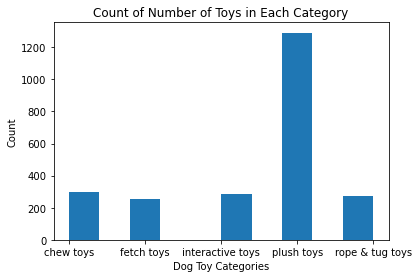

In [31]:
# Going to plot categories and subcategories 

plt.hist(df['cat'])
plt.xlabel('Dog Toy Categories')
plt.ylabel('Count')
plt.title("Count of Number of Toys in Each Category");

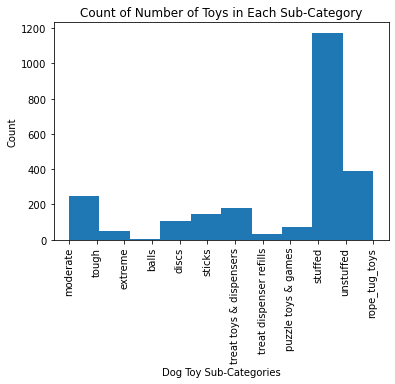

In [32]:
plt.hist(df['subcat'])
plt.xlabel('Dog Toy Sub-Categories')
plt.ylabel('Count')
plt.title("Count of Number of Toys in Each Sub-Category")
plt.xticks(rotation=90);

In [33]:
# plt.figure(figsize=(15, 6))
# plt.hist(df['subcat'], rwidth=)

# plt.xlabel('Dog Toy Sub-Categories')
# plt.ylabel('Count')
# plt.title('Count of Number of Toys in Each Sub-Category');

### Looking at the distribution of Ratings in Categories and Subcategories 

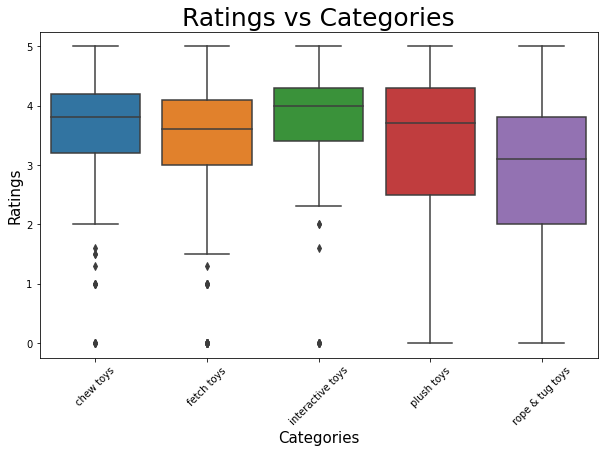

In [34]:
plt.figure(figsize=(10, 6))
cat = sns.boxplot(x='cat', y='rating', data=df)
cat.set_xticklabels(cat.get_xticklabels(), rotation=45)
cat.set_title('Ratings vs Categories', size=25) # What value of rating is this?
cat.set_xlabel('Categories', size=15)
cat.set_ylabel('Ratings', size=15);

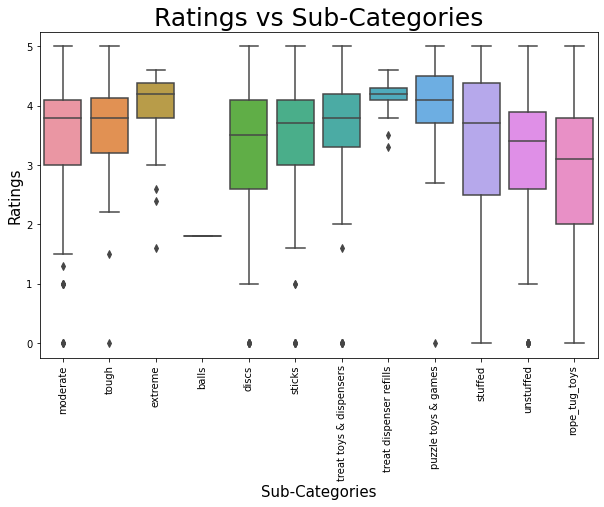

In [35]:
plt.figure(figsize=(10, 6))
subcat = sns.boxplot(x='subcat', y='rating', data=df)
subcat.set_xticklabels(subcat.get_xticklabels(), rotation=90)
subcat.set_title('Ratings vs Sub-Categories', size=25) # What value of rating is this?
subcat.set_xlabel('Sub-Categories', size=15)
subcat.set_ylabel('Ratings', size=15);

### Looking at Reviews
Going to try tokenizing and then removing stop words

In [36]:
df['reviews'][0]

"I do not know how to rate this. The puppy this was purchased for is a 10 wk. old Irish Wolfhound.\nShe carries this toy around quite a bit; however, she does not chew on it.  I do not know if it is the texture or the hardness of it.  She chews her other toys that are smoother and less hard.  I believe that it is this puppy’s preference and nothing to do with the toy itself. That is why I gave it a three; I have no clue as to how it will hold up if she does ever actually chew it., this is the winner of our chewy haul. ordered a variety of chew toys to try out for our new puppy and so far this is her favorite. she's only 9 weeks old, and like chewing on our fingers (ouch!) this toy is just slightly softer than a normal chew toy and she loves it. having a couple toys and ring seems to entertain her more than a typical bone. will it last forever? probably not. but nice to not have puppy shark teeth attacking my fingers., I read the reviews and thought we'd be safe. We have a 3 month borde

In [37]:
# sentence tokenizer
print(len(sent_tokenize(df['reviews'][0].lower())))
print(len(sent_tokenize(df['reviews'][1].lower())))
print(len(sent_tokenize(df['reviews'][2].lower())))

44
34
41


In [38]:
df['review_sent_len'] = 0
for i in range(len(df.index)):
    df['review_sent_len'][i] = len(sent_tokenize(df['reviews'][i].lower()))

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df.head()

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat,review_sent_len
0,Nylabone Teething Pacifier Puppy Chew Toy,3.59,'Every puppy needs a pacifier to soothe teethi...,Designed to encourage positive play and teach ...,4.2,I do not know how to rate this. The puppy this...,moderate,chew toys,44
1,"KONG Puppy Dog Toy, Color Varies",6.99,"""The Puppy KONG dog toy is customized for a gr...",Unpredictable bounce is great for energetic pu...,4.3,"I have had dozens of dogs over the years, and ...",moderate,chew toys,34
2,Petstages Dogwood Tough Dog Chew Toy,8.83,"""Chewing is a natural behavior in all dogs, as...",Chew toy that combines real wood with syntheti...,4.2,"Our 8 month old, shepherd/mastiff has had this...",moderate,chew toys,41
3,Nylabone Teething Rings Puppy Chew Toy,6.57,'Great for teething and tugging! The Puppy Tee...,Designed to encourage positive play and teach ...,4.1,I have a small shih tzu who absolutely loves t...,moderate,chew toys,24
4,Nylabone Puppy Teething X Bone Beef Flavored P...,6.89,'Curious puppies have met their match with the...,Non-edible dog toy is made for teething puppie...,4.1,This is a great shoe for a tiny puppy in there...,moderate,chew toys,21


In [40]:
df['review_word_leng'] = 0
for i in range(len(df.index)):
    df['review_word_leng'][i] = len(word_tokenize(df['reviews'][i].lower()))

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df.head()

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat,review_sent_len,review_word_leng
0,Nylabone Teething Pacifier Puppy Chew Toy,3.59,'Every puppy needs a pacifier to soothe teethi...,Designed to encourage positive play and teach ...,4.2,I do not know how to rate this. The puppy this...,moderate,chew toys,44,902
1,"KONG Puppy Dog Toy, Color Varies",6.99,"""The Puppy KONG dog toy is customized for a gr...",Unpredictable bounce is great for energetic pu...,4.3,"I have had dozens of dogs over the years, and ...",moderate,chew toys,34,732
2,Petstages Dogwood Tough Dog Chew Toy,8.83,"""Chewing is a natural behavior in all dogs, as...",Chew toy that combines real wood with syntheti...,4.2,"Our 8 month old, shepherd/mastiff has had this...",moderate,chew toys,41,894
3,Nylabone Teething Rings Puppy Chew Toy,6.57,'Great for teething and tugging! The Puppy Tee...,Designed to encourage positive play and teach ...,4.1,I have a small shih tzu who absolutely loves t...,moderate,chew toys,24,514
4,Nylabone Puppy Teething X Bone Beef Flavored P...,6.89,'Curious puppies have met their match with the...,Non-edible dog toy is made for teething puppie...,4.1,This is a great shoe for a tiny puppy in there...,moderate,chew toys,21,570


Going to look at removing stop words and observing length of reviews.  
*Used lessons 5.03 and 5.04 on NLP and Sentiment Analysis for this part*

In [42]:
# To first just look at the stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
tokenizer = RegexpTokenizer(r'\w+')

In [44]:
df['reviews'][0]

"I do not know how to rate this. The puppy this was purchased for is a 10 wk. old Irish Wolfhound.\nShe carries this toy around quite a bit; however, she does not chew on it.  I do not know if it is the texture or the hardness of it.  She chews her other toys that are smoother and less hard.  I believe that it is this puppy’s preference and nothing to do with the toy itself. That is why I gave it a three; I have no clue as to how it will hold up if she does ever actually chew it., this is the winner of our chewy haul. ordered a variety of chew toys to try out for our new puppy and so far this is her favorite. she's only 9 weeks old, and like chewing on our fingers (ouch!) this toy is just slightly softer than a normal chew toy and she loves it. having a couple toys and ring seems to entertain her more than a typical bone. will it last forever? probably not. but nice to not have puppy shark teeth attacking my fingers., I read the reviews and thought we'd be safe. We have a 3 month borde

In [45]:
df['tokenized_reviews'] = 0
for i in range(len(df.index)):
#     df['review_sent_leng'][i] = len(sent_tokenize(df['reviews'][i].lower()))
    review_tokens = tokenizer.tokenize(df['reviews'][i].lower())
    no_stop_words = [token for token in review_tokens if token not in stopwords.words('english')]
    df['tokenized_reviews'][i] = no_stop_words

/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/haleytaft/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [46]:
df.head()

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat,review_sent_len,review_word_leng,tokenized_reviews
0,Nylabone Teething Pacifier Puppy Chew Toy,3.59,'Every puppy needs a pacifier to soothe teethi...,Designed to encourage positive play and teach ...,4.2,I do not know how to rate this. The puppy this...,moderate,chew toys,44,902,"[know, rate, puppy, purchased, 10, wk, old, ir..."
1,"KONG Puppy Dog Toy, Color Varies",6.99,"""The Puppy KONG dog toy is customized for a gr...",Unpredictable bounce is great for energetic pu...,4.3,"I have had dozens of dogs over the years, and ...",moderate,chew toys,34,732,"[dozens, dogs, years, raising, puppies, defini..."
2,Petstages Dogwood Tough Dog Chew Toy,8.83,"""Chewing is a natural behavior in all dogs, as...",Chew toy that combines real wood with syntheti...,4.2,"Our 8 month old, shepherd/mastiff has had this...",moderate,chew toys,41,894,"[8, month, old, shepherd, mastiff, toy, 3, wee..."
3,Nylabone Teething Rings Puppy Chew Toy,6.57,'Great for teething and tugging! The Puppy Tee...,Designed to encourage positive play and teach ...,4.1,I have a small shih tzu who absolutely loves t...,moderate,chew toys,24,514,"[small, shih, tzu, absolutely, loves, chew, to..."
4,Nylabone Puppy Teething X Bone Beef Flavored P...,6.89,'Curious puppies have met their match with the...,Non-edible dog toy is made for teething puppie...,4.1,This is a great shoe for a tiny puppy in there...,moderate,chew toys,21,570,"[great, shoe, tiny, puppy, first, teeth, fear,..."


**Looking at Most Frequently Used Words**
Using TfidfVectorizer

In [47]:
# Instantiate the transformer.
tvec = TfidfVectorizer(stop_words='english')

Ok need to work on getting the vectorizer inside the list!

In [48]:
tvec.fit_transform(df['reviews']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
# creating the vectorized words dataframe
word_vector_df = pd.DataFrame(tvec.fit_transform(df['reviews']).toarray(),
                  columns=tvec.get_feature_names())
word_vector_df

# Is there a way to get the word as the column? 

,00,000,061820,10,100,1000,10000,100lb,100lbs,104,...,zooming,zooms,zucchini,zucchinis,zuchon,zukes,zuko,zumi,zuula,çute
0,0.0,0.0,0.0,0.026956,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.055185,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2395,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2396,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,0.031341,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df.shape

(2399, 11)

In [51]:
# get count of top-occurring words
top_words_tf = {}
for i in word_vector_df.columns:
    top_words_tf[i] =  word_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

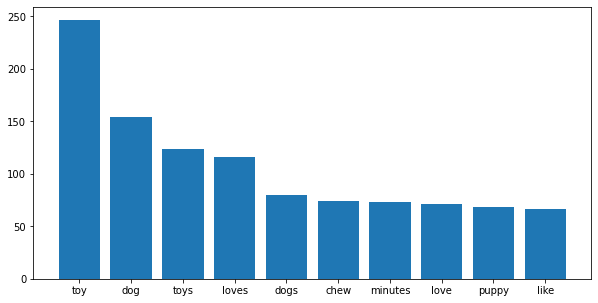

In [52]:
plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_freq_tf[0][:10], most_freq_tf[1][:10]);

Need to get the stop words out of the reviews! 

In [53]:
df.head()

,title,price,descriptions,key_benefits,rating,reviews,subcat,cat,review_sent_len,review_word_leng,tokenized_reviews
0,Nylabone Teething Pacifier Puppy Chew Toy,3.59,'Every puppy needs a pacifier to soothe teethi...,Designed to encourage positive play and teach ...,4.2,I do not know how to rate this. The puppy this...,moderate,chew toys,44,902,"[know, rate, puppy, purchased, 10, wk, old, ir..."
1,"KONG Puppy Dog Toy, Color Varies",6.99,"""The Puppy KONG dog toy is customized for a gr...",Unpredictable bounce is great for energetic pu...,4.3,"I have had dozens of dogs over the years, and ...",moderate,chew toys,34,732,"[dozens, dogs, years, raising, puppies, defini..."
2,Petstages Dogwood Tough Dog Chew Toy,8.83,"""Chewing is a natural behavior in all dogs, as...",Chew toy that combines real wood with syntheti...,4.2,"Our 8 month old, shepherd/mastiff has had this...",moderate,chew toys,41,894,"[8, month, old, shepherd, mastiff, toy, 3, wee..."
3,Nylabone Teething Rings Puppy Chew Toy,6.57,'Great for teething and tugging! The Puppy Tee...,Designed to encourage positive play and teach ...,4.1,I have a small shih tzu who absolutely loves t...,moderate,chew toys,24,514,"[small, shih, tzu, absolutely, loves, chew, to..."
4,Nylabone Puppy Teething X Bone Beef Flavored P...,6.89,'Curious puppies have met their match with the...,Non-edible dog toy is made for teething puppie...,4.1,This is a great shoe for a tiny puppy in there...,moderate,chew toys,21,570,"[great, shoe, tiny, puppy, first, teeth, fear,..."


**Making my own stop word lists**

In [54]:
stopwords = stopwords.words('english') + ['dog', 'toy', 'dogs', 'toys', 'one']

In [55]:
# Instantiate the transformer.
tvec_stopwords = TfidfVectorizer(stop_words=stopwords)

In [56]:
# creating the vectorized words dataframe
stopword_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(df['reviews']).toarray(),
                  columns=tvec_stopwords.get_feature_names())
stopword_vector_df

,00,000,061820,10,100,1000,10000,100lb,100lbs,104,...,zooming,zooms,zucchini,zucchinis,zuchon,zukes,zuko,zumi,zuula,çute
0,0.0,0.0,0.0,0.026590,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.054704,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2395,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2396,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,0.0,0.0,0.0,0.031531,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# get count of top-occurring words
top_stopwords_tf = {}
for i in stopword_vector_df.columns:
    top_stopwords_tf[i] =  stopword_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

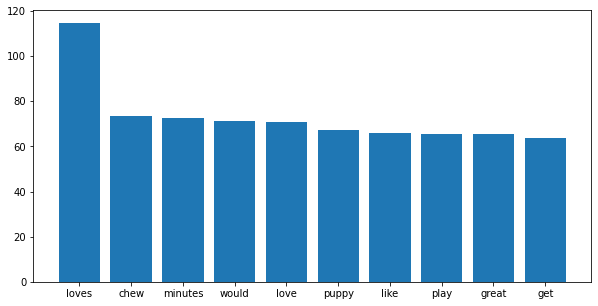

In [58]:
plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10]);

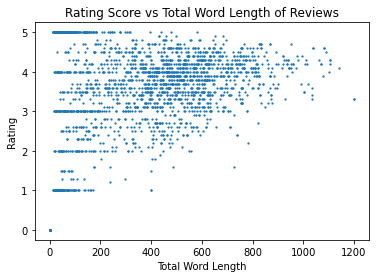

In [59]:
plt.scatter(x=df['review_word_leng'], y=df['rating'],
           s=1.5)
plt.title("Rating Score vs Total Word Length of Reviews")
plt.xlabel("Total Word Length")
plt.ylabel("Rating");

### Looking at Reviews of Each category (maybe will look at subcategory) 

**Chew Toys**

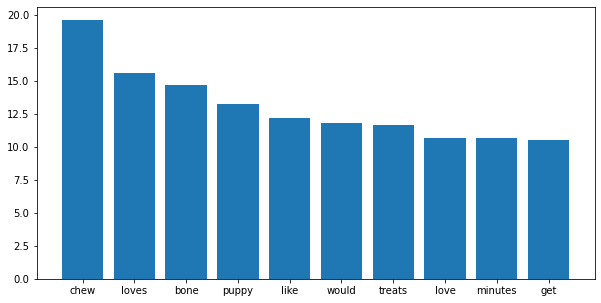

In [68]:
chew_reviews_df = df['reviews'][df['cat'] == 'chew toys']
chew_reviews_df = pd.DataFrame(chew_reviews_df)
chew_reviews_df

# creating the vectorized words dataframe
chew_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(chew_reviews_df['reviews']).toarray(),
                  columns=tvec_stopwords.get_feature_names())
chew_vector_df

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in chew_vector_df.columns:
    top_stopwords_tf[i] =  chew_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10]);

**Fetch Toys**

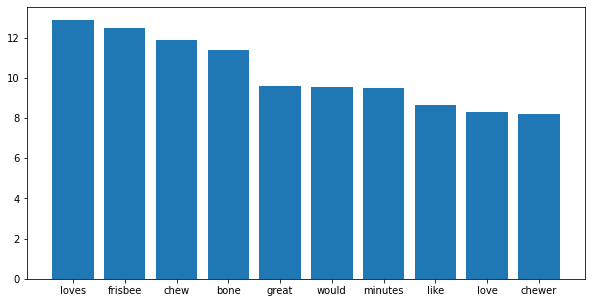

In [64]:
fetch_reviews_df = df['reviews'][df['cat'] == 'fetch toys']
fetch_reviews_df = pd.DataFrame(fetch_reviews_df)
fetch_reviews_df

# creating the vectorized words dataframe
fetch_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(fetch_reviews_df['reviews']).toarray(),
                  columns=tvec_stopwords.get_feature_names())
# chew_vector_df

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in fetch_vector_df.columns:
    top_stopwords_tf[i] =  fetch_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10]);

**Interactive Toys**

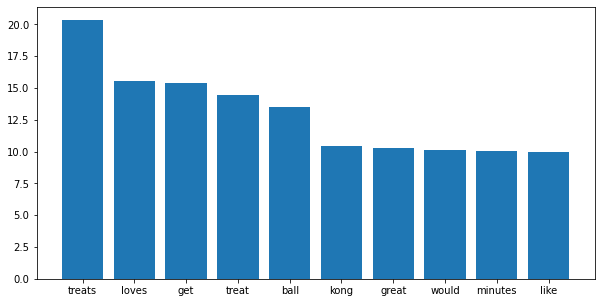

In [65]:
interactive_reviews_df = df['reviews'][df['cat'] == 'interactive toys']
interactive_reviews_df = pd.DataFrame(interactive_reviews_df)

# creating the vectorized words dataframe
interactive_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(interactive_reviews_df['reviews']).toarray(),
                  columns=tvec_stopwords.get_feature_names())

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in interactive_vector_df.columns:
    top_stopwords_tf[i] =  interactive_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10]);

**Plush Toys**

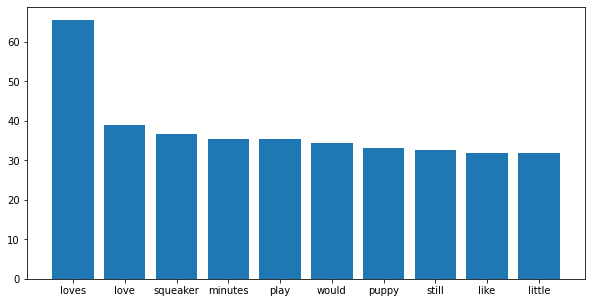

In [66]:
plush_reviews_df = df['reviews'][df['cat'] == 'plush toys']
plush_reviews_df = pd.DataFrame(plush_reviews_df)

# creating the vectorized words dataframe
plush_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(plush_reviews_df['reviews']).toarray(),
                  columns=tvec_stopwords.get_feature_names())

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in plush_vector_df.columns:
    top_stopwords_tf[i] =  plush_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10]);

**Rope & Tug Toys**

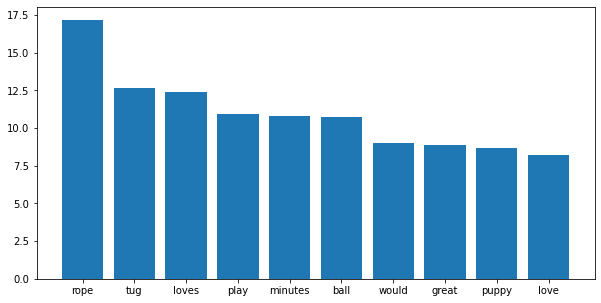

In [67]:
ropetug_reviews_df = df['reviews'][df['cat'] == 'rope & tug toys']
ropetug_reviews_df = pd.DataFrame(ropetug_reviews_df)

# creating the vectorized words dataframe
ropetug_vector_df = pd.DataFrame(tvec_stopwords.fit_transform(ropetug_reviews_df['reviews']).toarray(),
                  columns=tvec_stopwords.get_feature_names())

# get count of top-occurring words in chew toys
top_stopwords_tf = {}
for i in ropetug_vector_df.columns:
    top_stopwords_tf[i] =  ropetug_vector_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_stopfreq_tf = pd.DataFrame(sorted(top_stopwords_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_stopfreq_tf[0][:10], most_stopfreq_tf[1][:10]);